In [351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [319]:
def load_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = []
    current_class = None

    # Columns from the first line (removing the last two characters \n and space at the end)
    columns = lines[0].strip().split()
    columns.append('Class')  # Adding the 'Class' column for labels

    # Parse each line
    for line in lines[1:]:  # Start from the second line to skip header
        stripped_line = line.strip()
        if stripped_line.lstrip('-').isdigit():  # This is a class label, handles negative numbers
            current_class = int(stripped_line)
        else:
            # This is a data line, split by spaces and convert to float
            data_values = list(map(float, stripped_line.split()))
            data_values.append(current_class)  # Append the current class
            data.append(data_values)

    # Create DataFrame
    df = pd.DataFrame(data, columns=columns)
    return df


In [320]:
# Load and label the data including -1 correctly
df = load_data('rocket_league_skillshots.data')

In [321]:
df["Class"].unique()

array([ 6, -1,  1,  7,  2,  5,  3])

In [322]:
df.head()

,BallAcceleration,Time,DistanceWall,DistanceCeil,DistanceBall,PlayerSpeed,BallSpeed,up,accelerate,slow,goal,left,boost,camera,down,right,slide,jump,Class
0,1636.798772,0.000000,3498.01,2012.98,299.668270,104267.426232,99035.849338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6
1,3198.029397,0.138893,3494.08,2012.98,229.896780,124248.031988,102233.878734,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,6
2,0.000000,0.173617,3494.08,2012.98,237.350599,124248.031988,102968.358990,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6
3,9914.766242,0.312510,3500.08,2012.98,151.880921,115248.016009,112883.125231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6
4,5907.747166,0.625019,3521.65,2013.00,154.556104,125091.256173,118790.872398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6


In [323]:
df.dtypes

BallAcceleration    float64
Time                float64
DistanceWall        float64
DistanceCeil        float64
DistanceBall        float64
PlayerSpeed         float64
BallSpeed           float64
up                  float64
accelerate          float64
slow                float64
goal                float64
left                float64
boost               float64
camera              float64
down                float64
right               float64
slide               float64
jump                float64
Class                 int64
dtype: object

In [324]:
indices_to_convert = [7,8, 9, 10, 11, 12, 13, 14, 15, 16, 17]  # Corresponding to columns 'A', 'C', 'E'

# Converting specified columns to string using indices
for index in indices_to_convert:
    column_name = df.columns[index]
    df[column_name] = df[column_name].astype(str)
        

In [325]:
df.head()

,BallAcceleration,Time,DistanceWall,DistanceCeil,DistanceBall,PlayerSpeed,BallSpeed,up,accelerate,slow,goal,left,boost,camera,down,right,slide,jump,Class
0,1636.798772,0.000000,3498.01,2012.98,299.668270,104267.426232,99035.849338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6
1,3198.029397,0.138893,3494.08,2012.98,229.896780,124248.031988,102233.878734,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,6
2,0.000000,0.173617,3494.08,2012.98,237.350599,124248.031988,102968.358990,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6
3,9914.766242,0.312510,3500.08,2012.98,151.880921,115248.016009,112883.125231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6
4,5907.747166,0.625019,3521.65,2013.00,154.556104,125091.256173,118790.872398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6


In [326]:
df.head()

,BallAcceleration,Time,DistanceWall,DistanceCeil,DistanceBall,PlayerSpeed,BallSpeed,up,accelerate,slow,goal,left,boost,camera,down,right,slide,jump,Class
0,1636.798772,0.000000,3498.01,2012.98,299.668270,104267.426232,99035.849338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6
1,3198.029397,0.138893,3494.08,2012.98,229.896780,124248.031988,102233.878734,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,6
2,0.000000,0.173617,3494.08,2012.98,237.350599,124248.031988,102968.358990,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6
3,9914.766242,0.312510,3500.08,2012.98,151.880921,115248.016009,112883.125231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6
4,5907.747166,0.625019,3521.65,2013.00,154.556104,125091.256173,118790.872398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6


In [327]:
indices_to_convert = np.arange(7,18, 1) 


def convert_float(x):
    if x == '0.0':
        return '0'
    elif x == '1.0':
        return '1'
    # Convert other numbers to strings with their decimal part

# Apply the function to specified columns using indices
df.iloc[:, indices_to_convert] = df.iloc[:, indices_to_convert].applymap(convert_float)

In [328]:
df.head()

,BallAcceleration,Time,DistanceWall,DistanceCeil,DistanceBall,PlayerSpeed,BallSpeed,up,accelerate,slow,goal,left,boost,camera,down,right,slide,jump,Class
0,1636.798772,0.000000,3498.01,2012.98,299.668270,104267.426232,99035.849338,0,0,0,0,0,0,0,0,1,0,1,6
1,3198.029397,0.138893,3494.08,2012.98,229.896780,124248.031988,102233.878734,0,0,0,0,0,1,0,0,1,0,1,6
2,0.000000,0.173617,3494.08,2012.98,237.350599,124248.031988,102968.358990,0,0,0,0,0,1,0,0,0,0,0,6
3,9914.766242,0.312510,3500.08,2012.98,151.880921,115248.016009,112883.125231,0,0,0,0,0,0,0,0,1,0,0,6
4,5907.747166,0.625019,3521.65,2013.00,154.556104,125091.256173,118790.872398,0,0,0,0,0,0,0,0,1,0,1,6


In [329]:

df['Class'] = df['Class'].astype(str)
df['Class'].dtype

dtype('O')

In [330]:
df['Class'].replace('-1', 'Noise', inplace=True)
df['Class'].replace('1', 'Ceiling Shot', inplace=True)
df['Class'].replace('2', 'Power Shot', inplace=True)
df['Class'].replace('3', 'Waving Dash', inplace=True)
df['Class'].replace('5', 'Air Dribble', inplace=True)
df['Class'].replace('6', 'Front Flick', inplace=True)
df['Class'].replace('7', 'Musty Flick', inplace=True)

In [331]:
df.head()

,BallAcceleration,Time,DistanceWall,DistanceCeil,DistanceBall,PlayerSpeed,BallSpeed,up,accelerate,slow,goal,left,boost,camera,down,right,slide,jump,Class
0,1636.798772,0.000000,3498.01,2012.98,299.668270,104267.426232,99035.849338,0,0,0,0,0,0,0,0,1,0,1,Front Flick
1,3198.029397,0.138893,3494.08,2012.98,229.896780,124248.031988,102233.878734,0,0,0,0,0,1,0,0,1,0,1,Front Flick
2,0.000000,0.173617,3494.08,2012.98,237.350599,124248.031988,102968.358990,0,0,0,0,0,1,0,0,0,0,0,Front Flick
3,9914.766242,0.312510,3500.08,2012.98,151.880921,115248.016009,112883.125231,0,0,0,0,0,0,0,0,1,0,0,Front Flick
4,5907.747166,0.625019,3521.65,2013.00,154.556104,125091.256173,118790.872398,0,0,0,0,0,0,0,0,1,0,1,Front Flick


In [332]:
df['Class'].unique()

array(['Front Flick', 'Noise', 'Ceiling Shot', 'Musty Flick',
       'Power Shot', 'Air Dribble', 'Waving Dash'], dtype=object)

## Merging inputs into one column

In [333]:
df['move'] = df['up']+df['accelerate']+df['slow']+df['left']+df['boost']+df['camera']+df['down']+df['right']+df['slide']+df['jump']
df.head(5)

df = df.drop(['up', 'accelerate','slow', 'left','boost','camera','down', 'right','slide', 'jump'], axis = 1)
df.head(5)

,BallAcceleration,Time,DistanceWall,DistanceCeil,DistanceBall,PlayerSpeed,BallSpeed,goal,Class,move
0,1636.798772,0.000000,3498.01,2012.98,299.668270,104267.426232,99035.849338,0,Front Flick,0000000101
1,3198.029397,0.138893,3494.08,2012.98,229.896780,124248.031988,102233.878734,0,Front Flick,0000100101
2,0.000000,0.173617,3494.08,2012.98,237.350599,124248.031988,102968.358990,0,Front Flick,0000100000
3,9914.766242,0.312510,3500.08,2012.98,151.880921,115248.016009,112883.125231,0,Front Flick,0000000100
4,5907.747166,0.625019,3521.65,2013.00,154.556104,125091.256173,118790.872398,0,Front Flick,0000000101


In [334]:
df.to_csv('rocket_league_skillshots_raw.csv')

In [335]:
df['Class'].unique()

array(['Front Flick', 'Noise', 'Ceiling Shot', 'Musty Flick',
       'Power Shot', 'Air Dribble', 'Waving Dash'], dtype=object)

## Normalize the numerical data

In [336]:
scaler = MinMaxScaler()
float_columns = df.select_dtypes(include=['float']).columns
df[float_columns] = scaler.fit_transform(df[float_columns])

df.head(5)

,BallAcceleration,Time,DistanceWall,DistanceCeil,DistanceBall,PlayerSpeed,BallSpeed,goal,Class,move
0,0.522863,0.000000,0.012304,0.498257,0.025869,0.453272,0.300277,0,Front Flick,0000000101
1,0.525408,0.010311,0.012290,0.498257,0.018490,0.540155,0.309974,0,Front Flick,0000100101
2,0.520195,0.012889,0.012290,0.498257,0.019278,0.540155,0.312201,0,Front Flick,0000100000
3,0.536357,0.023200,0.012311,0.498257,0.010238,0.501020,0.342262,0,Front Flick,0000000100
4,0.529825,0.046400,0.012387,0.498262,0.010521,0.543821,0.360175,0,Front Flick,0000000101


In [337]:
df.dtypes

BallAcceleration    float64
Time                float64
DistanceWall        float64
DistanceCeil        float64
DistanceBall        float64
PlayerSpeed         float64
BallSpeed           float64
goal                 object
Class                object
move                 object
dtype: object

In [338]:
df.to_csv('preprocessed_rocket_league_skillshots.csv')

## Label Encoding the moves

In [339]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['move'] = le.fit_transform(df['move'])
# df['Class'] = le.fit_transform(df['Class'])

In [340]:
df.head()

,BallAcceleration,Time,DistanceWall,DistanceCeil,DistanceBall,PlayerSpeed,BallSpeed,goal,Class,move
0,0.522863,0.000000,0.012304,0.498257,0.025869,0.453272,0.300277,0,Front Flick,3
1,0.525408,0.010311,0.012290,0.498257,0.018490,0.540155,0.309974,0,Front Flick,22
2,0.520195,0.012889,0.012290,0.498257,0.019278,0.540155,0.312201,0,Front Flick,18
3,0.536357,0.023200,0.012311,0.498257,0.010238,0.501020,0.342262,0,Front Flick,2
4,0.529825,0.046400,0.012387,0.498262,0.010521,0.543821,0.360175,0,Front Flick,3


In [341]:
df['move'] = df["move"].astype("int")
df['move'].dtypes

dtype('int64')

In [342]:
df.to_csv('preprocessed_encoded_rocket_league_skillshots.csv')

In [343]:
df.dtypes

BallAcceleration    float64
Time                float64
DistanceWall        float64
DistanceCeil        float64
DistanceBall        float64
PlayerSpeed         float64
BallSpeed           float64
goal                 object
Class                object
move                  int64
dtype: object

In [344]:
df_dirty = df.copy()
df_dirty.to_csv('data_noise.csv')

In [345]:
df_clean = df.copy()
df_clean = df_clean.drop(df[df['Class'] == 'Noise'].index)


In [346]:
df_clean.head()

,BallAcceleration,Time,DistanceWall,DistanceCeil,DistanceBall,PlayerSpeed,BallSpeed,goal,Class,move
0,0.522863,0.000000,0.012304,0.498257,0.025869,0.453272,0.300277,0,Front Flick,3
1,0.525408,0.010311,0.012290,0.498257,0.018490,0.540155,0.309974,0,Front Flick,22
2,0.520195,0.012889,0.012290,0.498257,0.019278,0.540155,0.312201,0,Front Flick,18
3,0.536357,0.023200,0.012311,0.498257,0.010238,0.501020,0.342262,0,Front Flick,2
4,0.529825,0.046400,0.012387,0.498262,0.010521,0.543821,0.360175,0,Front Flick,3


In [347]:
df_clean.to_csv('data_clean.csv')

In [350]:
df_clean['Class'].unique()

array(['Front Flick', 'Ceiling Shot', 'Musty Flick', 'Power Shot',
       'Air Dribble', 'Waving Dash'], dtype=object)

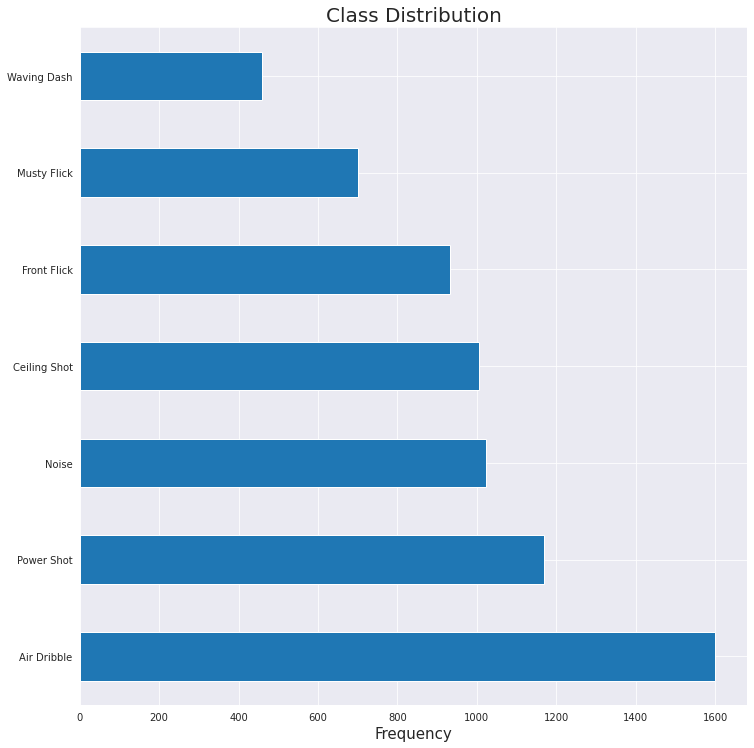

In [378]:
fig, ax = plt.subplots(figsize = (10,10))
fig.tight_layout()
df['Class'].value_counts()[:18].plot(kind='barh', ax = ax)
ax.set_title('Class Distribution', fontsize = 20)
ax.set_xlabel('Frequency', fontsize = 15)
plt.savefig('images/class_distribution.png', bbox_inches='tight')
plt.show()